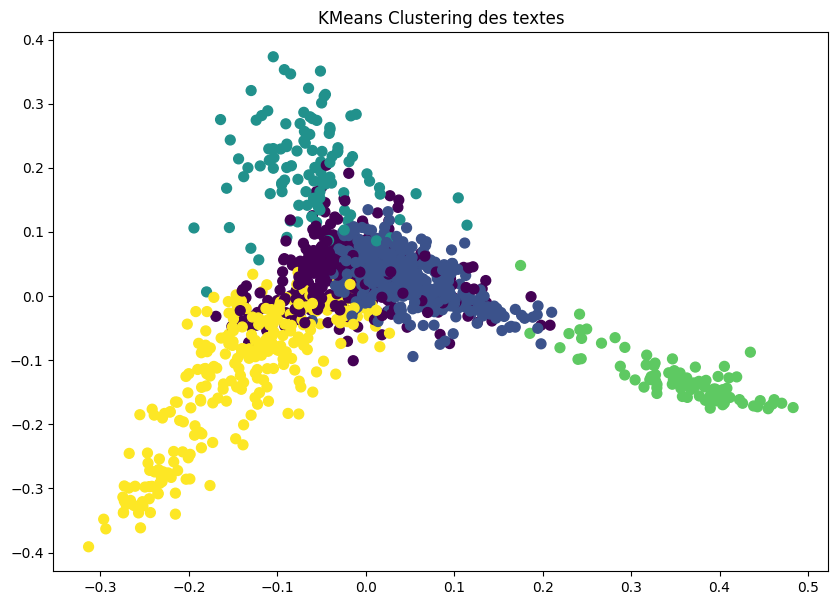

In [3]:
#KMeans
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_csv("data_nlp_ready.csv")

# Charger TF-IDF si pas encore fait
import pickle
with open('tfidf_matrix.pkl', 'rb') as f:
    X_tfidf = pickle.load(f)

# Choisir le nombre de clusters
n_clusters = 5  # tu peux ajuster selon ton dataset

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_kmeans = kmeans.fit_predict(X_tfidf)

# Ajouter les labels dans le dataframe
df['cluster_kmeans'] = labels_kmeans

# Visualiser avec PCA (2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("KMeans Clustering des textes")
plt.show()


In [5]:
pip install hdbscan

   ---------------------------------------- 0.0/730.9 kB ? eta -:--:--
   --------------------------------------- 730.9/730.9 kB 14.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\bough\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [6]:
#HDBSCAN (plus robuste pour texte)
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
labels_hdbscan = clusterer.fit_predict(X_tfidf.toarray())
df['cluster_hdbscan'] = labels_hdbscan

# Vérifier les clusters
print(df['cluster_hdbscan'].value_counts())



C:\Users\bough\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\bough\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


cluster_hdbscan
-1     793
 16    216
 3      45
 20     19
 9      17
 11     15
 12     14
 4      13
 17     11
 1      10
 0      10
 13      9
 5       8
 2       8
 18      7
 19      7
 7       7
 10      6
 14      6
 15      5
 6       5
 8       5
Name: count, dtype: int64
